# Mods Analyzer

## 1. Load mods from dump file

Run `01_pull_mods_from_hotutils.py`, if you haven't yet

In [1]:
import pickle

from libs.mod.mod import Mod

MODS_DUMP_FILE = "data/hotutils_mods_dump.pkl"

with open(MODS_DUMP_FILE, "rb") as f:
    mods: list[Mod] = pickle.load(f)
    
orignial_count = len(mods)
print(f'Loaded {len(mods)} mods')

# remove mods lower than rarity 5
mods = list(filter(lambda mod: mod.rarity >= 5, mods))
filtered_count = len(mods)
print(f'Found {filtered_count} 5-dot and 6-dot mods')


# show the best 5 mods
sorted_mods = sorted(mods, key=lambda mod: mod.scores[0], reverse=True)
for mod in sorted_mods[0:min(5, len(mods))]:
    print(mod)

Loaded 1515 mods
Found 1515 5-dot and 6-dot mods
Mod GUk8cNCOSr6rOVlB0zm-3w 
    ├─ 6-dot Blue Offense Square [75+64=139] 
    ├─ Primary: OffensePercent=8.5 
    └─ Secondaries: (2)DefensePercent=7.38[34]  (1)Defense=12[11]  (5)Speed=26[73]  (2)ProtectionPercent=5.39[32] 
Mod 7AWmPvJSRR2dm4prMRfrHw 
    ├─ 6-dot Purple Tenacity Cross [73+52=125] 
    ├─ Primary: ProtectionPercent=24 
    └─ Secondaries: (2)DefensePercent=4.83[8]  (5)Speed=28[87]  (2)Health=950[30]  (2)Defense=30[36] 
Mod uj3OoQtkQZeXz2LfetEr0w 
    ├─ 6-dot Golden Health Diamond [66+59=125] 
    ├─ Primary: DefensePercent=20 
    └─ Secondaries: (1)HealthPercent=1.86[17]  (5)Speed=25[67]  (5)OffensePercent=6.88[62]  (1)Defense=13[13] 
Mod Ij2yGCtrQAyEAugguz44vA 
    ├─ 6-dot Gray Speed Diamond [70+54=124] 
    ├─ Primary: DefensePercent=20 
    └─ Secondaries: (1)Protection=561[4]  (1)Offense=47[17]  (5)Speed=26[73]  (1)Defense=15[18] 
Mod V6-Jod0EQUmxTks-k4iygQ 
    ├─ 6-dot Gray Speed Circle [67+55=121] 
    ├─ Prim

## 2. Calculate mod scores and construct a Pandas DataFrame

In [2]:
from pandas import DataFrame

mods_df = DataFrame([mod.__dict__ for mod in mods])

[total_scores, base_scores, bonus_scores] = list(zip(*[mod.scores for mod in mods]))
total_rolls = [mod.total_rolls for mod in mods]

mods_df['Total Score'] = total_scores
mods_df['Base Score'] = base_scores
mods_df['Bonus Score'] = bonus_scores
mods_df['Total Rolls'] = total_rolls

mods_df.head(10)


,id,set,slot,rarity,level,tier,primary,secondaries,Total Score,Base Score,Bonus Score,Total Rolls
0,S1B-0UHnRuumWgutPhNwkw,ModSet.Speed,ModSlot.Arrow,6,15,1,OffensePercent=8.5,"[(2)DefensePercent=4.71, (3)ProtectionPercent=...",44.687500,44.687500,0.000000,8
1,KIKYACaES1Wmj1Wg8BxsTw,ModSet.Defense,ModSlot.Arrow,5,15,5,HealthPercent=5.88,"[(1)Tenacity=2.06, (3)Speed=14, (3)ProtectionP...",67.257788,67.257788,0.000000,8
2,iFIs2FoyQLeyO8nd-eb_qg,ModSet.Health,ModSlot.Arrow,5,15,5,Accuracy=12,"[(2)Defense=15, (1)DefensePercent=1.13, (2)Ten...",45.089869,45.089869,0.000000,8
3,5xXAr385R1-SbM5PM2kDbg,ModSet.CriticalDamage,ModSlot.Triangle,5,15,5,DefensePercent=11.75,"[(1)Defense=7, (2)Speed=11, (4)Protection=2308...",58.768072,58.768072,0.000000,8
4,yYkZFn5AQYOG8IW9OHlQew,ModSet.Health,ModSlot.Arrow,5,15,5,DefensePercent=11.75,"[(1)Potency=1.71, (2)ProtectionPercent=3.95, (...",53.314421,53.314421,0.000000,8
5,nprZGAqLQjGYVPVsBxos-A,ModSet.CriticalDamage,ModSlot.Triangle,5,15,5,DefensePercent=11.75,"[(2)Speed=11, (3)Defense=19, (1)OffensePercent...",66.339820,66.339820,0.000000,8
6,G74pQAA4R1qvZXBmYatuIA,ModSet.Speed,ModSlot.Arrow,5,15,5,OffensePercent=5.88,"[(2)Protection=1435, (1)Offense=31, (2)Health=...",53.217135,53.217135,0.000000,8
7,Ssl8yJ5-T8qWGYCIjpgG6w,ModSet.Health,ModSlot.Arrow,5,15,3,OffensePercent=5.88,"[(1)Protection=643, (1)Potency=1.33, (3)Health...",50.914502,50.914502,0.000000,6
8,5kWH0dauSTyGGMAz8SLt0g,ModSet.Health,ModSlot.Circle,5,15,3,ProtectionPercent=23.5,"[(1)Speed=5, (1)Health=329, (1)DefensePercent=...",93.249941,66.525177,26.724764,6
9,Lg-ycVzBS9G4lvnzm7T6mQ,ModSet.Health,ModSlot.Square,5,15,5,OffensePercent=5.88,"[(1)Speed=5, (2)Health=745, (2)DefensePercent=...",70.354590,70.354590,0.000000,8


## 3. Plot distribution of all mods

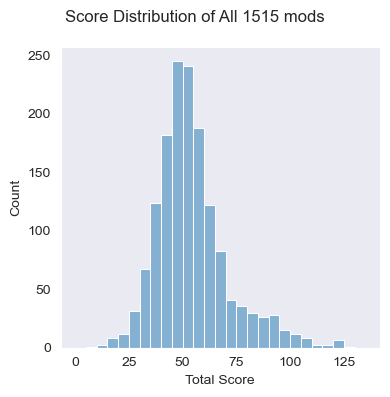

In [3]:
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("dark")

max_score = mods_df['Total Score'].max()

max_bin_edge = math.ceil(max_score / 5) * 5

bins = list(range(0, max_bin_edge, 5))

fig, axes = plt.subplots(1, 1, figsize=(4, 4), sharex=True, sharey=True, tight_layout=True)

sns.histplot(ax=axes, data=mods_df, x="Total Score", bins=bins, alpha=.5)


fig.suptitle(f'Score Distribution of All {len(mods)} mods')

pass

# total_scores = mods_df["Total Score"].tolist()
# base_scores = mods_df["Base Score"].tolist()
# bonus_scores = list(filter(lambda x: x > 0, mods_df["Bonus Score"].tolist()))
# data = {
#     "Total Score": total_scores,
#     "Base Score": base_scores,
#     "Bonus Score": bonus_scores,
# }

# sns.histplot(ax=axes, data=data, binwidth=5, multiple='dodge', alpha=.5)

# axes.set_xlabel('Score')

# sns.histplot(ax=axes, data=mods_df, x="Total Score", binwidth=5, alpha=.5)
# sns.histplot(ax=axes, data=mods_df, x="Base Score", binwidth=5, alpha=.5)
# sns.histplot(ax=axes, data=mods_df, x="Bonus Score", binwidth=5, alpha=.5)



## 4. Plot score distribution of raritie 5-6 and all 5 tiers

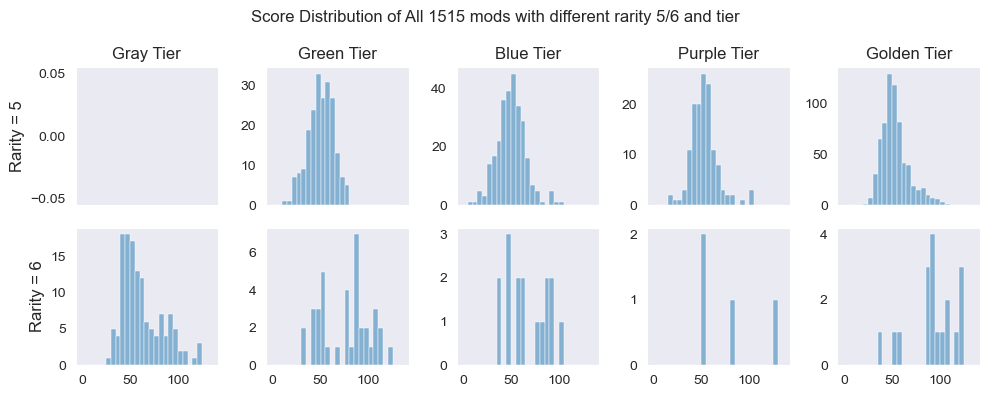

In [4]:
sharey = False
# sharey = True # comment this out if it's hard to see the count of some subplots

fig, axes = plt.subplots(2, 5, figsize=(10, 4), sharex=True, sharey=sharey, tight_layout=True)

rarities = [5, 6]
tiers = list(range(1,6))

for rarity in rarities:
    sub_df = mods_df[mods_df['rarity'] == rarity]
    row = rarity - rarities[0]
    for tier in tiers:
        data = sub_df[sub_df['tier'] == tier]
        col = tier - tiers[0]
        ax=axes[row][col]
        sns.histplot(ax=ax, data=data, x="Total Score", bins=bins, alpha=.5)
        ax.set_xlabel('')
        ax.set_ylabel('')
        

axes[0][0].set_title('Gray Tier')
axes[0][1].set_title('Green Tier')
axes[0][2].set_title('Blue Tier')
axes[0][3].set_title('Purple Tier')
axes[0][4].set_title('Golden Tier')
axes[0][0].set_ylabel('Rarity = 5', fontsize = 12)
axes[1][0].set_ylabel('Rarity = 6', fontsize = 12)
fig.suptitle(f'Score Distribution of All {len(mods)} mods with different rarity 5/6 and tier')
        
        

pass

## 5. Plot score distribution across different number of rolls

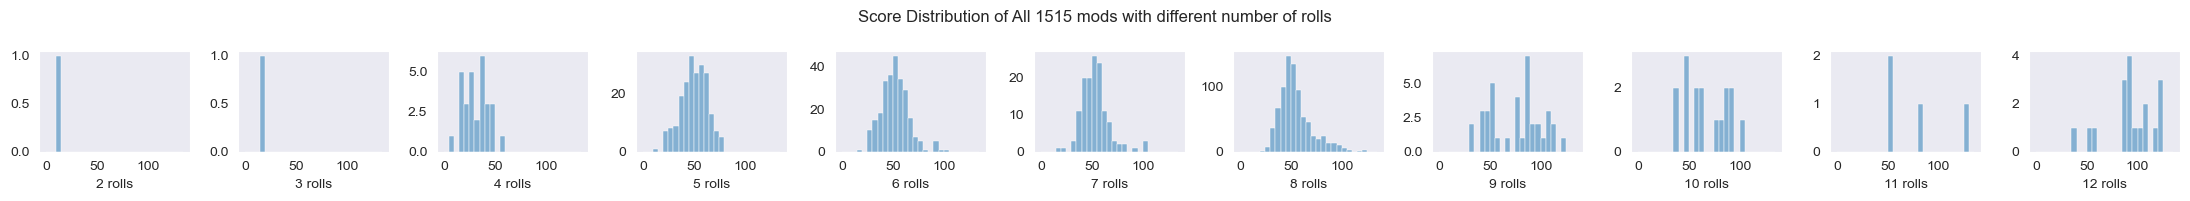

In [5]:
roll_values = sorted(list(set(mods_df['Total Rolls'])))
roll_value_count = len(roll_values)

fig, axes = plt.subplots(1, roll_value_count, figsize=(2 * roll_value_count, 2), sharex=True, sharey=False, tight_layout=True)

for i in range(roll_value_count):
    data = mods_df[mods_df['Total Rolls'] == roll_values[i]]
    ax=axes[i]
    sns.histplot(ax=ax, data=data, x="Total Score", bins=bins, alpha=.5)
    ax.set_xlabel(f'{roll_values[i]} rolls')
    ax.set_ylabel('')
    
fig.suptitle(f'Score Distribution of All {len(mods)} mods with different number of rolls')
pass
